In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path
from glob import glob

from subprocess import Popen, PIPE, STDOUT

In [9]:
base_path='C:/kaggle/input/arc-prize-2025/'
# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [10]:
training_challenges   = load_json(base_path +'arc-agi_training_challenges.json')
training_solutions    = load_json(base_path +'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions  = load_json(base_path +'arc-agi_evaluation_solutions.json')

test_challenges       = load_json(base_path +'arc-agi_test_challenges.json')

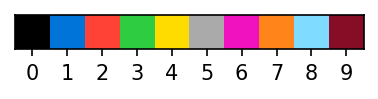

In [11]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [14]:
def plot_task(task, task_solutions, i, t):
    """    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app    """    
    fs=12    
    num_train = len(task['train'])
    #num_test  = len(task['test'])
    num_test  = 1
    
    w=num_train+num_test
    fig, axs  = plt.subplots(2, w, figsize=(2*w,2*2))
    #fig, axs  = plt.subplots(2, w, figsize=(1.5*w, 1.5*2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=fs, fontweight='bold', y=1)
    #plt.subplots_adjust(hspace = 0.15)
    #plt.subplots_adjust(wspace=20, hspace=20)
    
    for j in range(num_train):     
        plot_one(axs[0, j], j,task, 'train', 'input')
        plot_one(axs[1, j], j,task,'train', 'output')        
    
    plot_one(axs[0, j+1], 0, task, 'test', 'input')

    answer = task_solutions
    input_matrix = answer
    
    axs[1, j+1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j+1].grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    axs[1, j+1].set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    axs[1, j+1].set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1].set_title('Test output')

    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, num_train+1])
    
    for m in range(1, num_train):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = 'black')
    
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = 'black')

    axs[1, j+1].axis("off")

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black') 
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()  
    
    print()
    #print()
    
    
def plot_one(ax, i, task, train_or_test, input_or_output):
    fs=12 
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    ax.set_title(train_or_test + ' ' + input_or_output, fontsize=fs-2)

#0, 0934a4d8


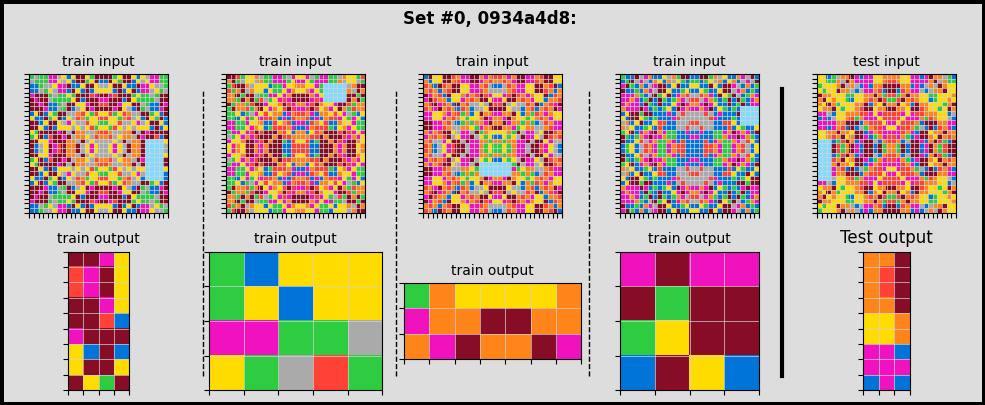


#1, 135a2760


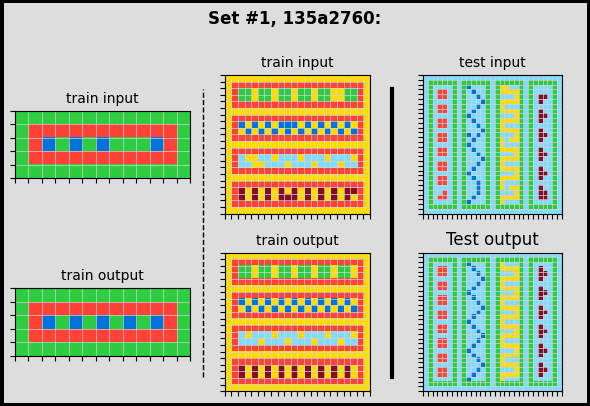


#2, 136b0064


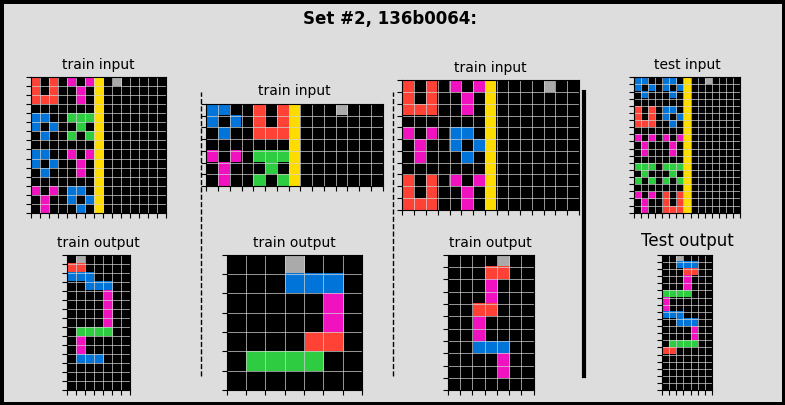


#3, 13e47133


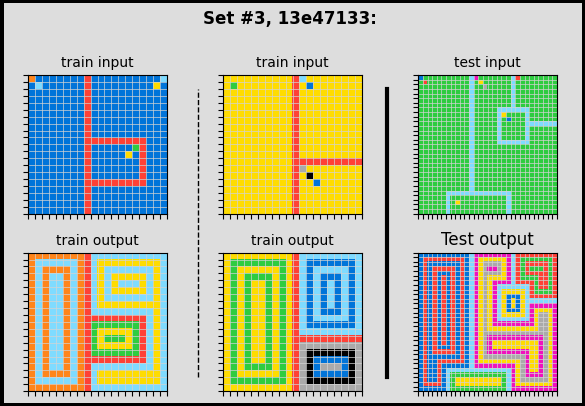


#4, 142ca369


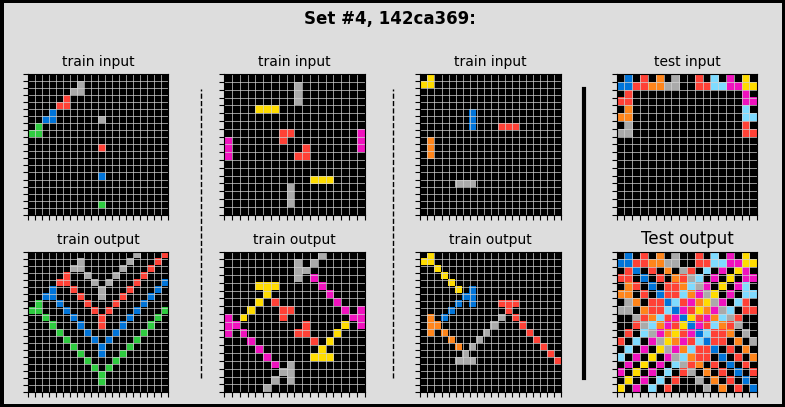


#5, 16b78196


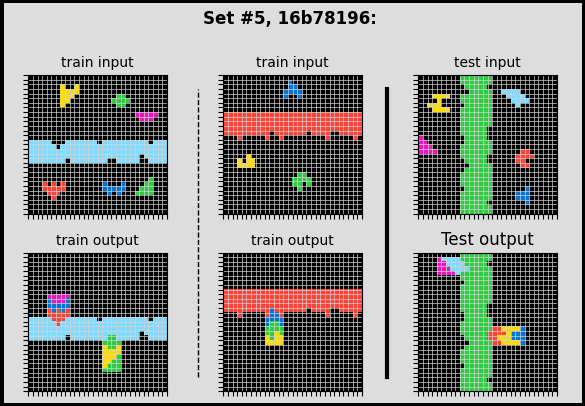


#6, 16de56c4


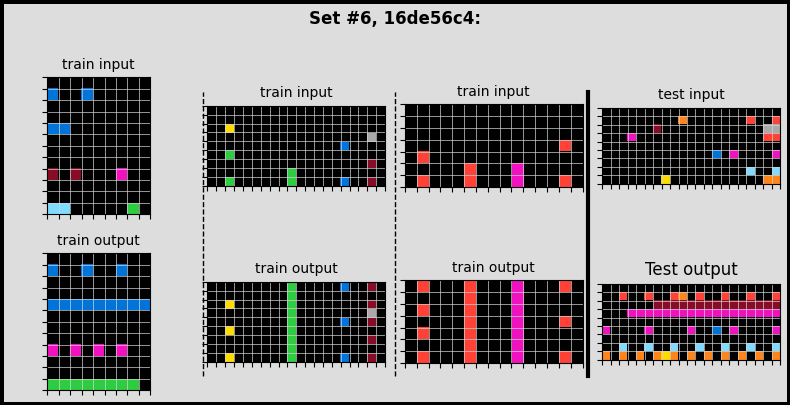


#7, 1818057f


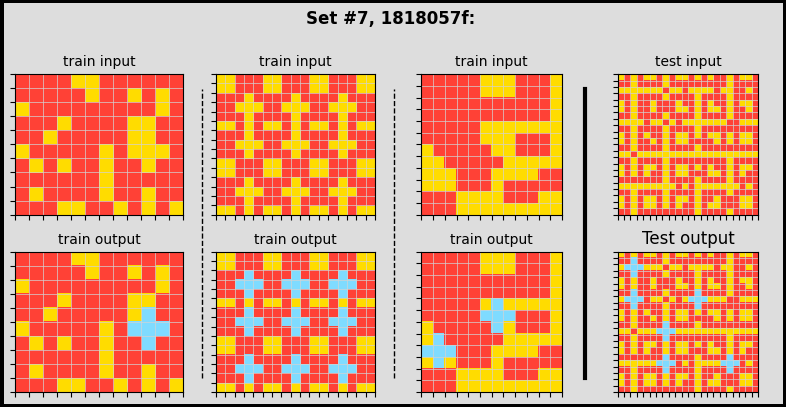


#8, 195c6913


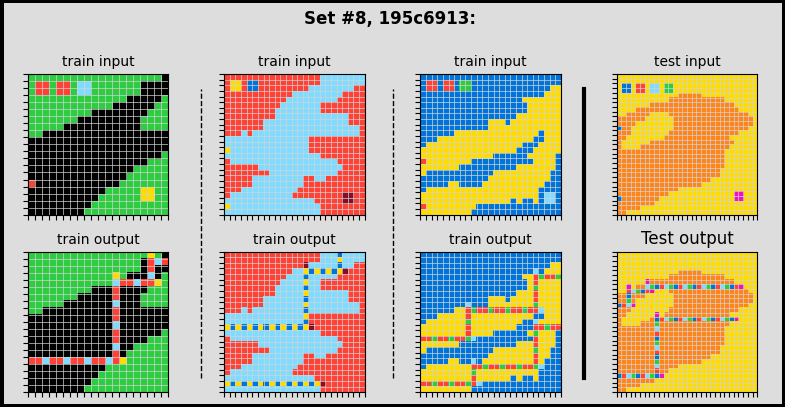


#9, 1ae2feb7


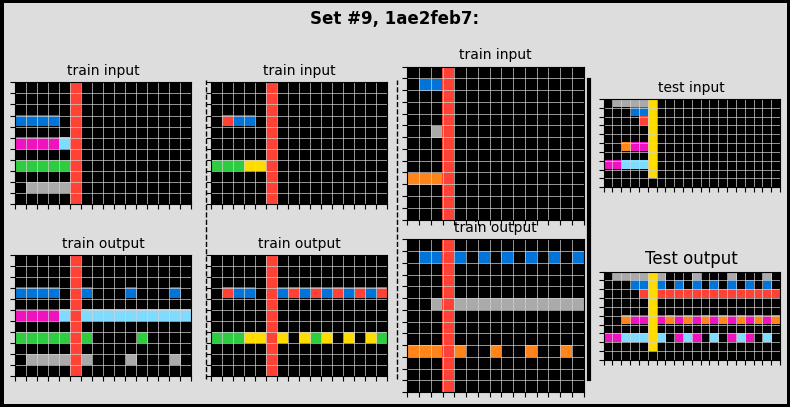

In [15]:
for i in range(0, 10):
    t=list(evaluation_challenges)[i]
    task=evaluation_challenges[t]
    task_solution = evaluation_solutions[t][0]
    plot_task(task,  task_solution, i, t)